# Simulation of Stochastic Martingales in Python## Simulating martingales
Step size: 0.01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def brownian(interval, step):    
    n = int(interval/step)
    B = [0]
    for i in range(n):
        B.append(B[-1] + np.sqrt(step) * np.random.standard_normal())
    return np.array(B)

## (a) Compensated squared Brownian motion
Simulate 5 paths of \(B_t^2 - t\) for \(t \in [0,1]\) with step size 0.01.

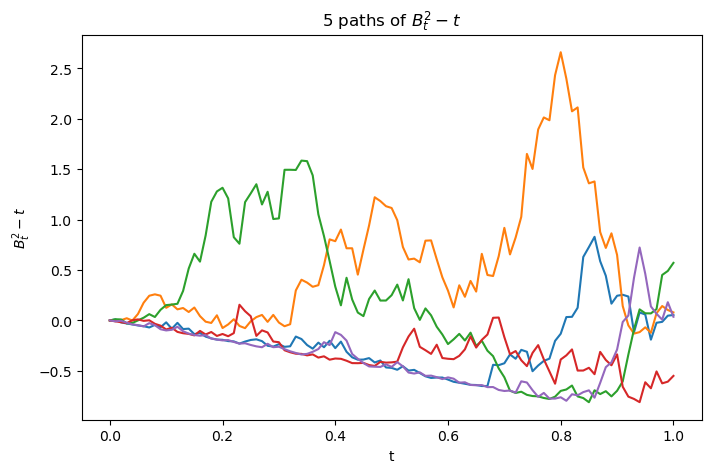

In [3]:
step = 0.01
t = np.linspace(0, 1, int(1/step) + 1)

plt.figure(figsize=(8,5))
for i in range(5):
    B = brownian(1, step)
    M = B**2 - t
    plt.plot(t, M)

plt.title("5 paths of $B_t^2 - t$")
plt.xlabel("t")
plt.ylabel("$B_t^2 - t$")
plt.show()

### Discussion

The process 
$$
M_t = B_t^2 - t
$$
is a martingale.

Using Itô’s formula applied to $f(x)=x^2$, we obtain
$$
d(B_t^2) = 2B_t\, dB_t + dt.
$$
Therefore,
$$
d(B_t^2 - t) = 2B_t\, dB_t.
$$

Since the stochastic integral $\int_0^t 2B_s dB_s$ has zero expectation, it follows that
$$
\mathbb{E}[B_t^2 - t] = 0.
$$

The simulated paths fluctuate around zero without a deterministic drift, which confirms the martingale property. The variability increases with time, as expected since the variance of $B_t^2$ grows with $t$.

## (b) Geometric Brownian motion
Simulate 5 paths of \(\exp(B_t - t/2)\) for \(t \in [0,1]\) with step size 0.01.

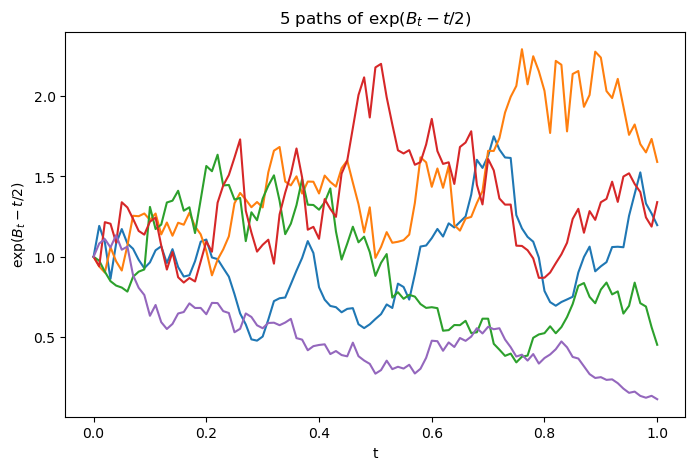

In [4]:
plt.figure(figsize=(8,5))
for i in range(5):
    B = brownian(1, step)
    X = np.exp(B - t/2)
    plt.plot(t, X)

plt.title("5 paths of $\\exp(B_t - t/2)$")
plt.xlabel("t")
plt.ylabel("$\\exp(B_t - t/2)$")
plt.show()

### Discussion

The process
$$
X_t = \exp(B_t - t/2)
$$
is the exponential martingale associated with Brownian motion.

Applying Itô’s formula to $f(x)=e^x$, we obtain
$$
dX_t = X_t\, dB_t.
$$

Thus, $X_t$ is a martingale and satisfies
$$
\mathbb{E}[X_t] = 1.
$$

The simulated paths remain strictly positive and exhibit multiplicative random fluctuations, which are characteristic of geometric Brownian motion. The absence of deterministic drift confirms the martingale property.

## (c) Poisson process (rate 1)
Simulate 5 paths of \(N_t\) for \(t \in [0,10]\) with step size 0.01.

In [5]:
def poisson(interval, step, rate=1.0):
    n = int(interval/step)
    N = [0]
    for i in range(n):
        N.append(N[-1] + np.random.poisson(rate * step))
    return np.array(N)

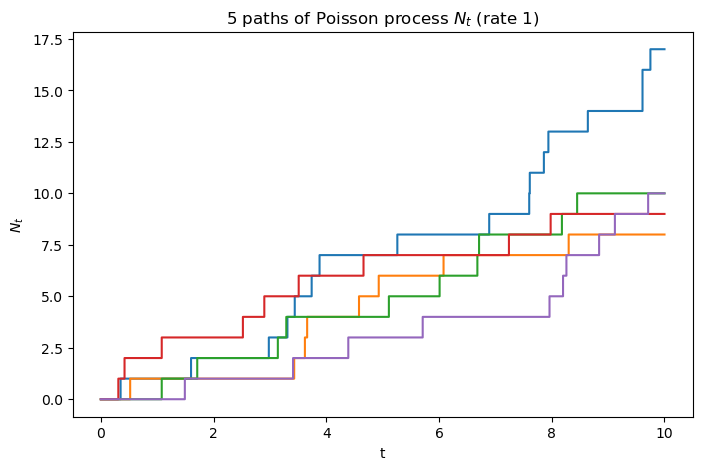

In [6]:
T = 10
tP = np.linspace(0, T, int(T/step) + 1)

plt.figure(figsize=(8,5))
for i in range(5):
    N = poisson(T, step, rate=1.0)
    plt.step(tP, N, where="post")

plt.title("5 paths of Poisson process $N_t$ (rate 1)")
plt.xlabel("t")
plt.ylabel("$N_t$")
plt.show()

### Discussion

The Poisson process $N_t$ with rate 1 is a counting process with independent and stationary increments.

It satisfies
$$
\mathbb{E}[N_t] = t.
$$

The simulated paths are increasing step functions with jumps of size 1 occurring at random times, which matches the theoretical definition of a Poisson process.

The linear growth in expectation is clearly visible in the overall upward trend of the paths.

## (d) Compensated Poisson process (rate 1)
Simulate 5 paths of \(N_t - t\) for \(t \in [0,10]\) with step size 0.01.

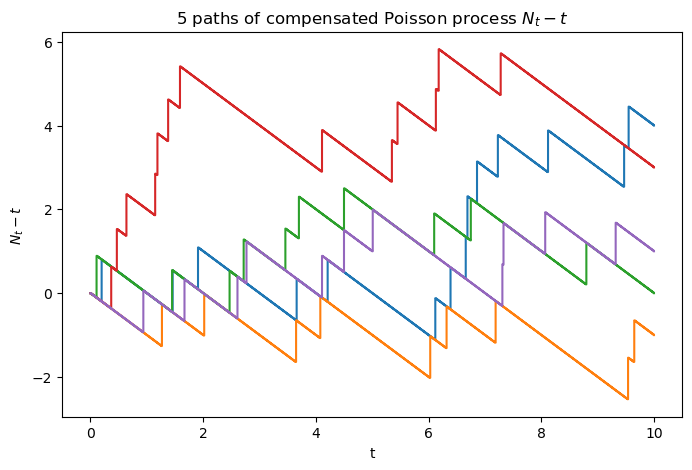

In [7]:
plt.figure(figsize=(8,5))
for i in range(5):
    N = poisson(T, step, rate=1.0)
    M = N - tP
    plt.step(tP, M, where="post")

plt.title("5 paths of compensated Poisson process $N_t - t$")
plt.xlabel("t")
plt.ylabel("$N_t - t$")
plt.show()

### Discussion

The compensated Poisson process
$$
M_t = N_t - t
$$
is a martingale.

Indeed,
$$
\mathbb{E}[N_t - t] = 0.
$$

The simulated paths combine upward jumps (coming from $N_t$) with a continuous negative linear drift (coming from $-t$). As a result, the process fluctuates around zero.

This confirms that subtracting the compensator removes the deterministic trend and produces a martingale.

### Conclusion

In this project, we simulated several classical martingales derived from Brownian motion and Poisson processes.

The numerical simulations confirm the theoretical properties:
- Compensation removes deterministic drift.
- The resulting processes have zero expectation.
- Brownian-based martingales are continuous.
- Poisson-based martingales exhibit jumps.

These simulations illustrate how martingales naturally arise from stochastic processes after appropriate compensation.